<a href="https://colab.research.google.com/github/victor-radermecker/Capstone_JPMorgan/blob/branch-XGB/XGB_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install geemap
!pip install imageio
!pip install imagecodecs

In [2]:
import ee
import sys
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
ee.Authenticate()

In [4]:
# import local modules
import sys
sys.path.append('/content/drive/MyDrive/src')

from Fishnet import Fishnet
from ImageExporter import ImageExporter
from ImageCorrector import ImageCorrector
from ImageProcessor import ImageProcessor
from XGB import XGB

# update files automatically
%load_ext autoreload
%autoreload 2

# Authenticate to Earth Engine
ee.Initialize(project="jpmorgancapstone")

In [5]:
# load the object
fishnet = Fishnet.load('/content/drive/MyDrive/Code/Gis/Fishnet/fishnet_quarter_mile_completed.pkl')

# Predict Δ urbanization

In [6]:
# instance of class XGB
xgb = XGB(fishnet, filtered = True)

In [7]:
# drop unnecessary columns
xgb.df.drop(columns = ['ImageCoordinates', 'geometry', 'Width', 'Height', 'Entropy_2021'], axis = 1, inplace = True)

In [8]:
yearStart = 2016
yearEnd = 2021

xgb.feature_engineering(yearStart, yearEnd)

In [9]:
# remove original features
xgb.remove_original_features()

In [11]:
xgb.df

,id,batch_id,neighbors,Entropy_2020,MeanPixel_2021,Delta1_MeanPixel_2016_2017,Delta2_mean_2016_2017,Delta1_Entropy_2016_2017,Delta1_MeanPixel_2017_2018,Delta2_mean_2017_2018,Delta1_Entropy_2017_2018,Delta1_MeanPixel_2018_2019,Delta2_mean_2018_2019,Delta1_Entropy_2018_2019,Delta1_MeanPixel_2019_2020,Delta2_mean_2019_2020,Delta1_Entropy_2019_2020,Delta1_MeanPixel_2020_2021,Delta2_mean_2020_2021
6060154,6060154.0,23743.0,"[6056884, 6056885, 6056886, 6060153, 6060155, ...",0.511536,233.041667,16.150000,-0.059074,-0.096832,24.933333,-0.164892,-0.218321,-2.691667,0.025104,0.028472,6.375000,-0.063856,-0.069786,7.083333,0.015432
6060155,6060155.0,23743.0,"[6056885, 6056886, 6056887, 6060154, 6060156, ...",0.450721,237.613636,8.548295,-0.053910,-0.073271,16.082386,-0.154565,-0.172144,-0.869318,0.011219,0.010684,2.463068,-0.032993,-0.030757,6.664773,0.014224
6060156,6060156.0,23743.0,"[6056886, 6056887, 6056888, 6060155, 6060157, ...",0.979869,168.583333,-7.225000,0.002948,0.005871,3.683333,-0.001209,-0.002411,10.625000,-0.006954,-0.013760,1.416667,-0.001328,-0.002605,19.833333,0.062500
6060157,6060157.0,23743.0,"[6056887, 6056888, 6056889, 6060156, 6060158, ...",0.535715,214.200000,-13.458333,-0.012421,-0.024340,13.883333,0.012674,0.024841,91.233333,-0.167009,-0.284056,18.133333,-0.138796,-0.172678,-9.633333,-0.021992
6060158,6060158.0,23743.0,"[6056888, 6056889, 6056890, 6060157, 6060159, ...",0.653878,196.066667,1.700000,-0.007823,-0.011988,-3.541667,0.015899,0.024562,15.583333,-0.083320,-0.120709,1.133333,-0.007696,-0.010142,-16.008333,-0.039222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439546,6439546.0,25395.0,"[6436276, 6436277, 6436278, 6439545, 6439547, ...",0.121176,4.926136,0.144886,1.000000,0.006945,2.897727,0.861495,0.086399,1.303977,0.143075,0.031170,-0.144886,-0.013585,-0.003338,0.724432,0.079365
6439547,6439547.0,25395.0,"[6436277, 6436278, 6436279, 6439546, 6439548, ...",0.045415,2.125000,0.850000,0.283836,0.025548,1.133333,0.207708,0.030294,-1.416667,-0.279317,-0.038458,-0.141667,-0.044191,-0.004199,0.850000,0.250000
6439548,6439548.0,25395.0,"[6436278, 6436279, 6436280, 6439547, 6439549, ...",0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
6439549,6439549.0,25395.0,"[6436279, 6436280, 6436281, 6439548, 6439550, ...",0.247364,7.508333,0.425000,0.149142,0.012878,9.775000,0.679352,0.210233,-4.533333,-0.196501,-0.085349,3.825000,0.172725,0.072866,-2.975000,-0.165354


<font color = 'red'> Still haven't done this part </font>

In [ ]:
additional_columns = pd.DataFrame(columns = [f"Neighbors_Delta{j}_{year}_{year+1}" for year in range(2017, 2022) for j in [1,2,3]])

for index, row in tqdm(df.iterrows()):

  # filter only neighbors
  df_filtered = df[df["id"].isin(row["neighbors"])]

  # keep subset of Delta columns
  df_filtered = df_filtered[[f"Delta{j}_{year}_{year+1}" for year in range(2017, 2022) for j in [1,2,3]]]

  # compute mean
  mean_neighbors = df_filtered.mean().tolist()

  # append to dataframe
  additional_columns.loc[len(additional_columns)] = mean_neighbors

# change index to prepare for merging
additional_columns.index = df.index

# add new features to the original dataframe
df = pd.concat([df, additional_columns], axis = 1)

21411it [04:04, 87.52it/s] 


In [ ]:
# perform linear regression and assess results
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from matplotlib import pyplot as plt

In [ ]:
to_drop = ["id", "geometry", "batch_id", "neighbors"] + [f"Delta{j}_2021_2022"  for j in [1,2,3]] + [f"Neighbors_Delta{j}_2021_2022" for j in [1,2,3]]

In [ ]:
# in df fill NaN with 0
df.fillna(0, inplace = True) # FIND BETTER WAY TO DO THIS

# drop useless columns for prediction and target variables
X = df.drop(to_drop, axis = 1)
y = df["Delta1_2021_2022"]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test):

  # fit the model to the training data
  model.fit(X_train, y_train)

  # make predictions on the test data
  y_pred = model.predict(X_test)

  # compute rmse
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  # calculate the R^2 score
  r2 = r2_score(y_test, y_pred)

  # call function to plot results
  plot_results(y_test, y_pred, r2, rmse)

In [ ]:
def plot_results(y_test, y_pred, r2, rmse):

  # plot the predicted vs true values
  plt.scatter(y_test, y_pred)
  plt.xlabel("True Values")
  plt.ylabel("Predictions")
  plt.title(f"Regression\nR^2 Score: {r2:.2f}, RMSE: {rmse:.2f}")
  plt.show()


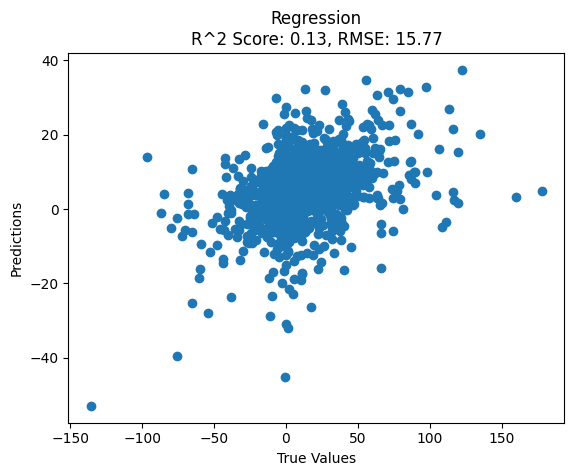

In [ ]:
train_model(LinearRegression(), X_train, X_test, y_train, y_test)

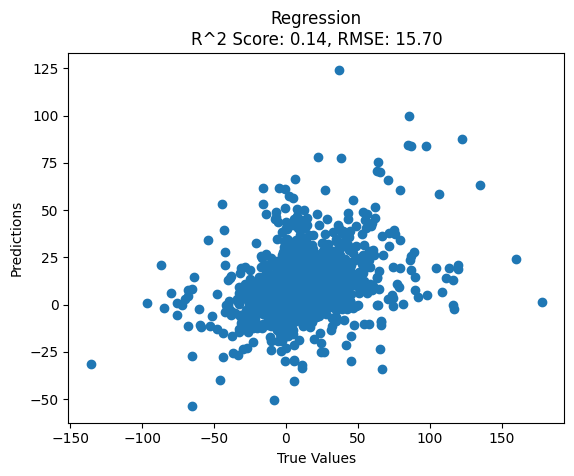

In [ ]:
train_model(xgb.XGBRegressor(), X_train, X_test, y_train, y_test)
